In [1]:
import pathlib

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_SEED = 42

In [2]:
DATA_DIR = pathlib.Path.cwd().parent / 'data'
print(DATA_DIR)

d:\machine-learning\ames\data


In [3]:
processed_data_x_path = DATA_DIR / 'processed' / 'ames_processed_x_v1.csv'
processed_data_y_path = DATA_DIR / 'processed' / 'ames_processed_y_v1.csv'

X = pd.read_csv(processed_data_x_path)
y = pd.read_csv(processed_data_y_path)

In [4]:
X.head()

,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Lot.Shape,Land.Contour,Lot.Config,Land.Slope,Neighborhood,Bldg.Type,...,House.Age,Total.SF,Total.Floor.SF,Total.Porch.SF,Total.Bathrooms,Has.Basement,Has.Garage,Has.Porch,Has.Pool,Was.Completed
0,20,RL,4.955827,10.366309,1.098612,1.609438,Corner,1.386294,NAmes,1Fam,...,3.931826,7.914618,7.412764,4.143135,2.0,1,1,1,0,1
1,20,RH,4.394449,9.360741,0.693147,1.609438,Inside,1.386294,NAmes,1Fam,...,3.912023,7.483807,6.799056,4.795791,1.0,1,1,1,0,1
2,20,RL,4.406719,9.565775,1.098612,1.609438,Corner,1.386294,NAmes,1Fam,...,3.970292,7.885705,7.192934,3.610918,1.5,1,1,1,0,1
3,20,RL,4.543295,9.320181,0.693147,1.609438,Corner,1.386294,NAmes,1Fam,...,3.761200,8.347827,7.654917,0.000000,3.5,1,1,0,0,1
4,60,RL,4.317488,9.534668,1.098612,1.609438,Inside,1.386294,Gilbert,1Fam,...,2.639057,7.846981,7.396335,3.555348,2.5,1,1,1,0,1


In [5]:
# hide warnings

import warnings

warnings.filterwarnings('ignore')

In [6]:
#all columns that start with has are boolean cols
boolean_cols = [col for col in X.columns if col.startswith('Has') or col.startswith('Was')]

numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in boolean_cols]

print(numerical_cols)

['Lot.Frontage', 'Lot.Area', 'Lot.Shape', 'Land.Contour', 'Land.Slope', 'Overall.Qual', 'Overall.Cond', 'Mas.Vnr.Area', 'Exter.Qual', 'Exter.Cond', 'Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure', 'BsmtFin.SF.1', 'BsmtFin.SF.2', 'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'Heating.QC', 'X1st.Flr.SF', 'X2nd.Flr.SF', 'Low.Qual.Fin.SF', 'Gr.Liv.Area', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'Full.Bath', 'Half.Bath', 'Bedroom.AbvGr', 'Kitchen.AbvGr', 'Kitchen.Qual', 'TotRms.AbvGrd', 'Functional', 'Fireplaces', 'Garage.Finish', 'Garage.Cars', 'Garage.Area', 'Paved.Drive', 'Wood.Deck.SF', 'Open.Porch.SF', 'Enclosed.Porch', 'X3Ssn.Porch', 'Screen.Porch', 'Pool.Area', 'Misc.Val', 'Mo.Sold', 'Yr.Sold', 'Garage.Age', 'Remod.Age', 'House.Age', 'Total.SF', 'Total.Floor.SF', 'Total.Porch.SF', 'Total.Bathrooms']


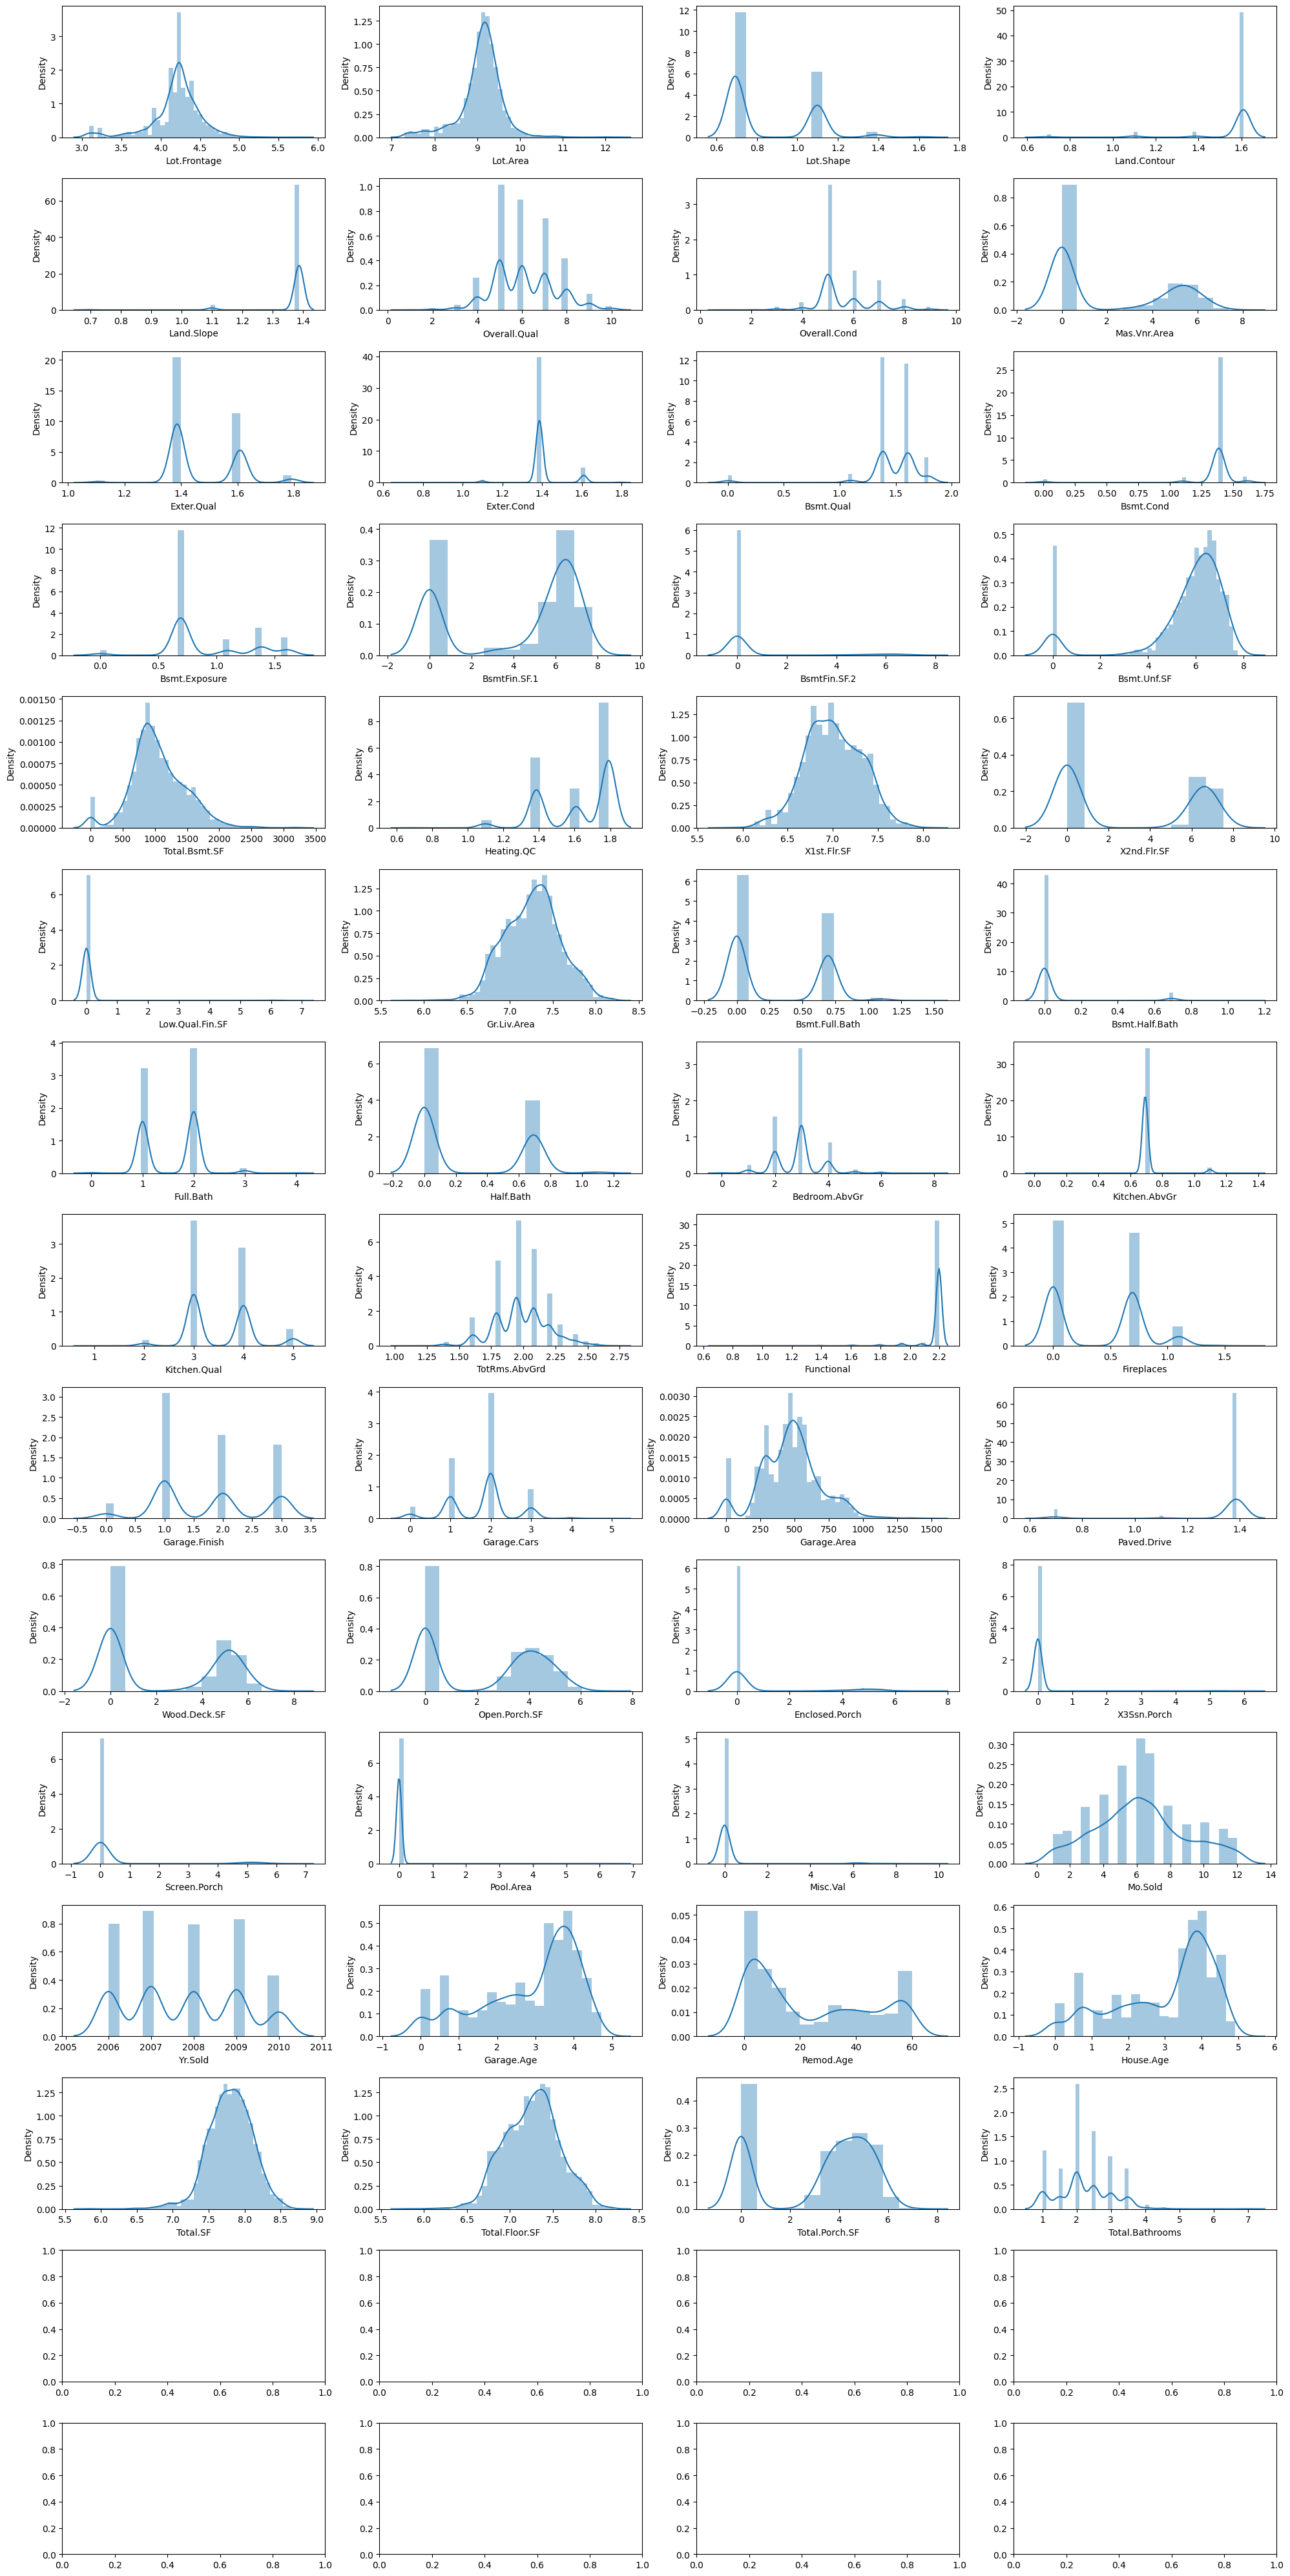

In [7]:

# plot all numerical features
fig, axes = plt.subplots(57//4 + 1, 4, figsize=(20, 40))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.distplot(X[col], ax=axes[i])

plt.tight_layout()


In [8]:
# Drop individual number of bathrooms
X.drop(['Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'Full.Bath', 'Half.Bath'], axis=1, inplace=True)

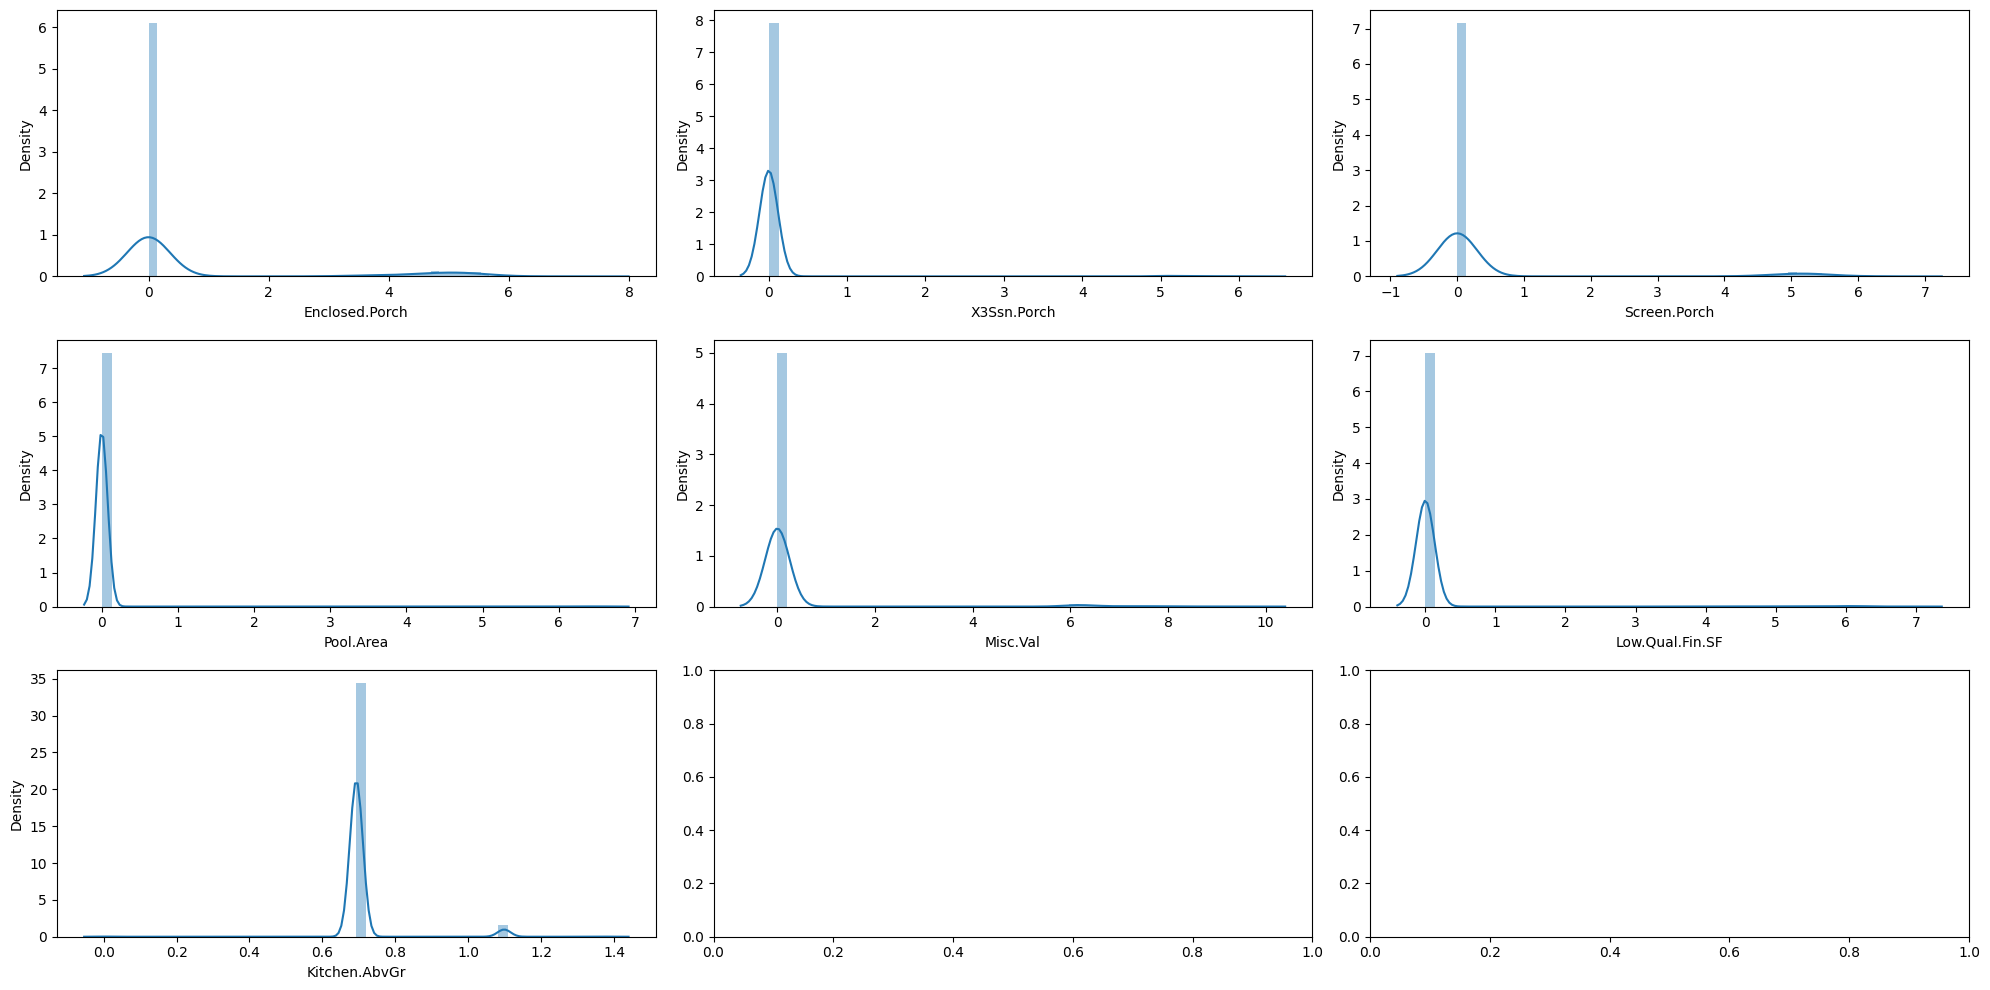

In [9]:
# Plot the columns Enclosed.Porch, X3Ssn.Porch, Screen.Porch, Pool.Area, Misc.Val, Low.Qual.Fin.SF, Kitchen.AbvGr

fig, axes = plt.subplots(3, 3, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(['Enclosed.Porch', 'X3Ssn.Porch', 'Screen.Porch', 'Pool.Area', 'Misc.Val', 'Low.Qual.Fin.SF', 'Kitchen.AbvGr']):
    sns.distplot(X[col], ax=axes[i])

plt.tight_layout()

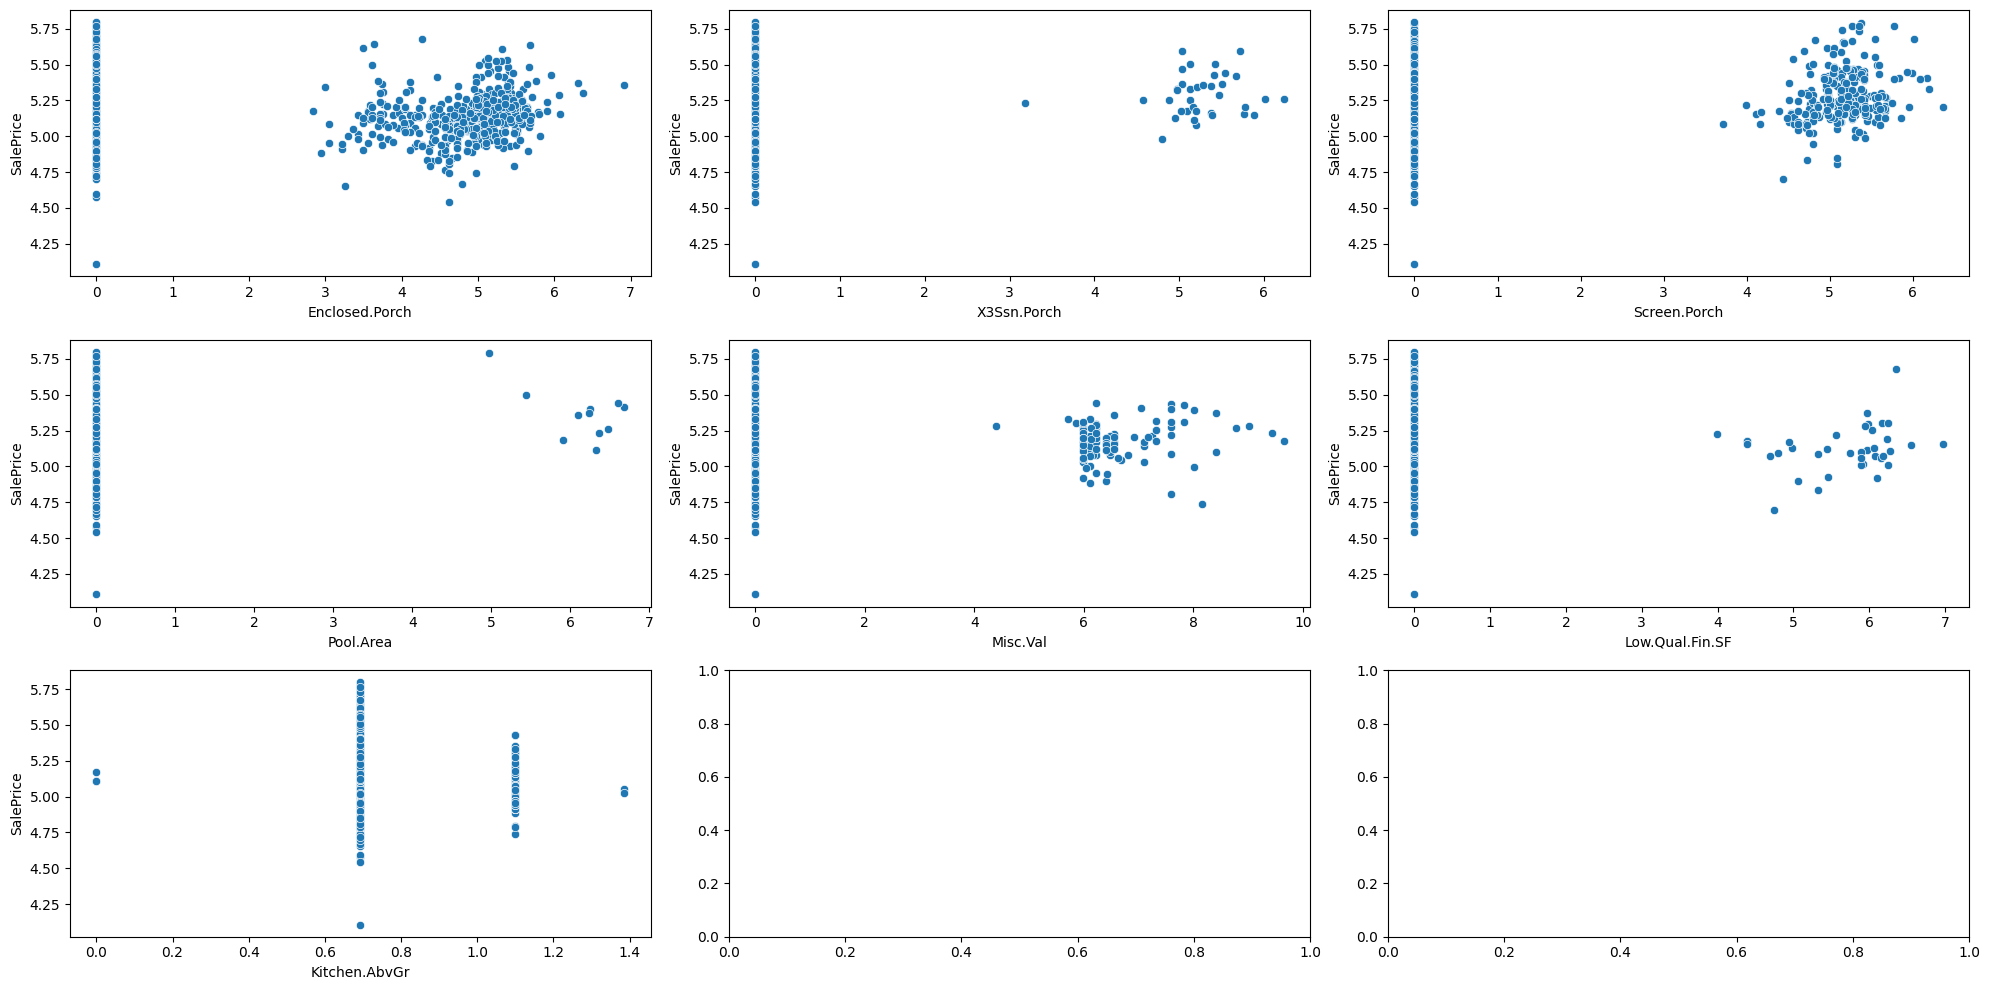

In [22]:
#Plot those columns compared to SalePrice

fig, axes = plt.subplots(3, 3, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(['Enclosed.Porch', 'X3Ssn.Porch', 'Screen.Porch', 'Pool.Area', 'Misc.Val', 'Low.Qual.Fin.SF', 'Kitchen.AbvGr']):
    sns.scatterplot(x=X[col], y=y['SalePrice'], ax=axes[i])

plt.tight_layout()

As 6 primeiras features parecem ter pouca influência, já que possuem grande concentração de valores repetidos que variam muito de SalePrice.

Vamos testar retirá-las.

Para Kitchen.AbvGr, vamos testar remover os outliers, ou seja, os valores 0 e maior que 1.2

In [10]:
# Realiza as mudanças comentadas acima, dropa as 5 primeiras features

X.drop(['Enclosed.Porch', 'X3Ssn.Porch', 'Screen.Porch', 'Pool.Area', 'Low.Qual.Fin.SF', 'Misc.Val'], axis=1, inplace=True)

# Remove os valores de Kitchen.AbvGr maiores que 1.2 e menores que 0.2

X = X[(X['Kitchen.AbvGr'] < 1.2) & (X['Kitchen.AbvGr'] > 0.2)]
y = y.loc[X.index]

In [11]:
# Get correlation between Garage.Area and Garage.Cars

X[['Garage.Area', 'Garage.Cars']].corr()

,Garage.Area,Garage.Cars
Garage.Area,1.000000,0.890392
Garage.Cars,0.890392,1.000000


A correlação é muito alta! Podemos dropar Garage.Cars

In [12]:
# Drop garage.cars

X.drop('Garage.Cars', axis=1, inplace=True)
y = y.loc[X.index]

In [14]:
# Separando as novas colunas restantes

numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in boolean_cols]

categorical_cols = X.select_dtypes(include='object').columns.tolist()

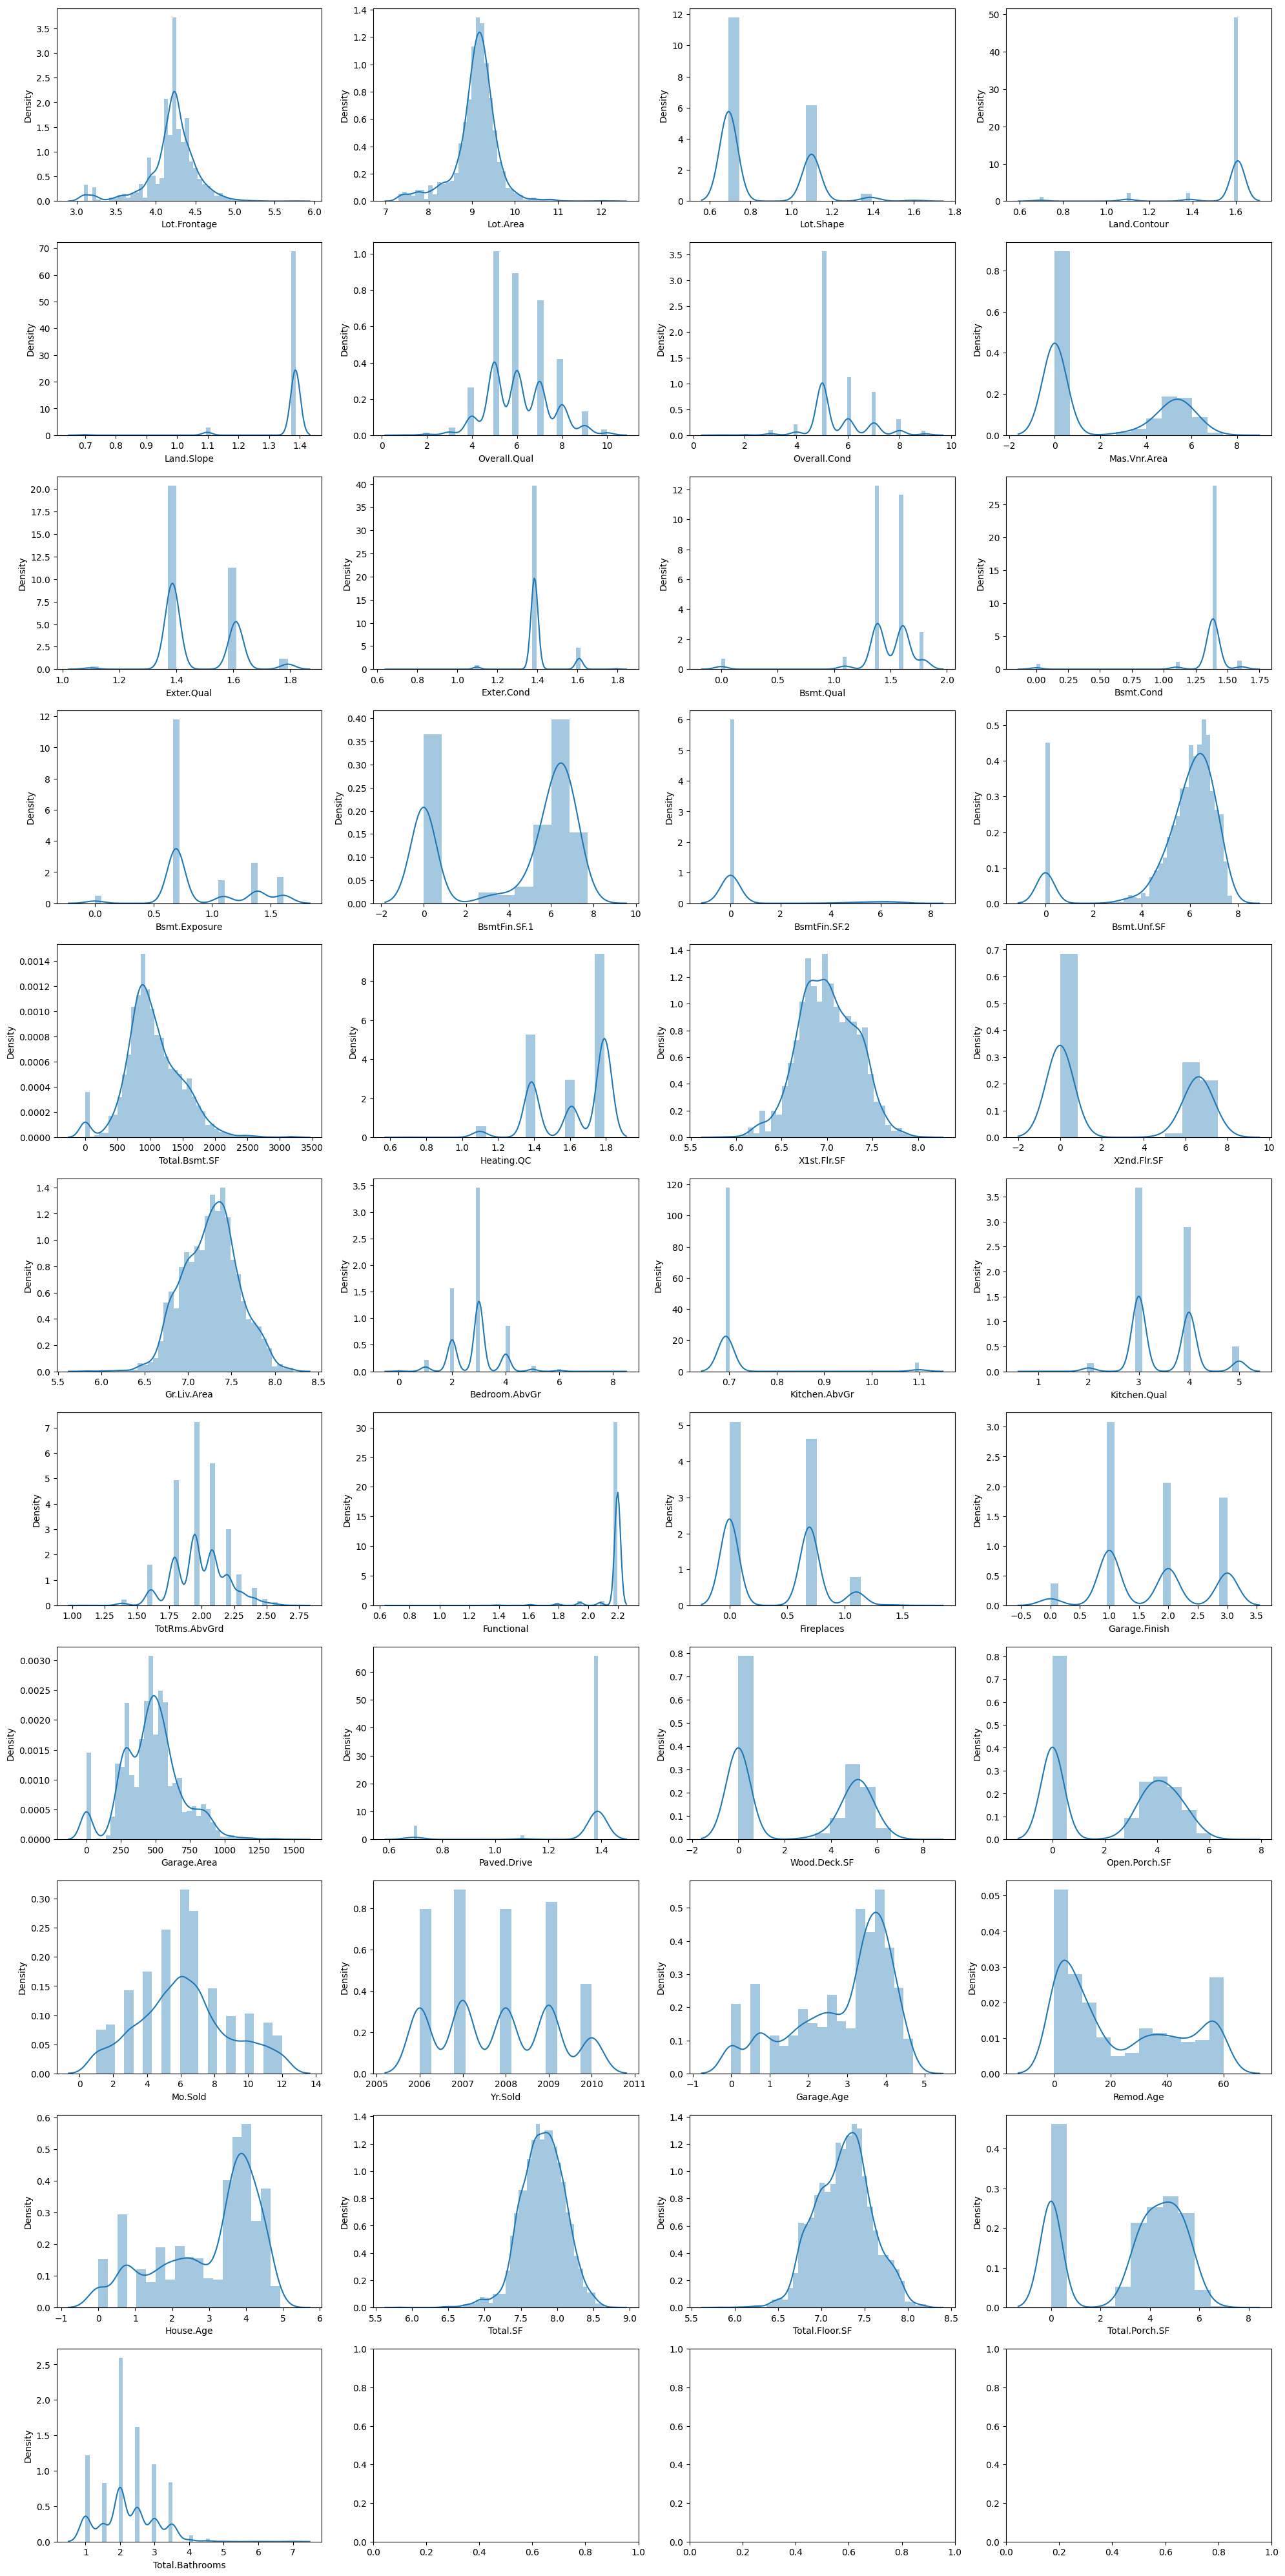

In [16]:
# plot all numerical features
fig, axes = plt.subplots(len(numerical_cols)//4 + 1, 4, figsize=(20, 40))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.distplot(X[col], ax=axes[i])

plt.tight_layout()


# Categorical Columns

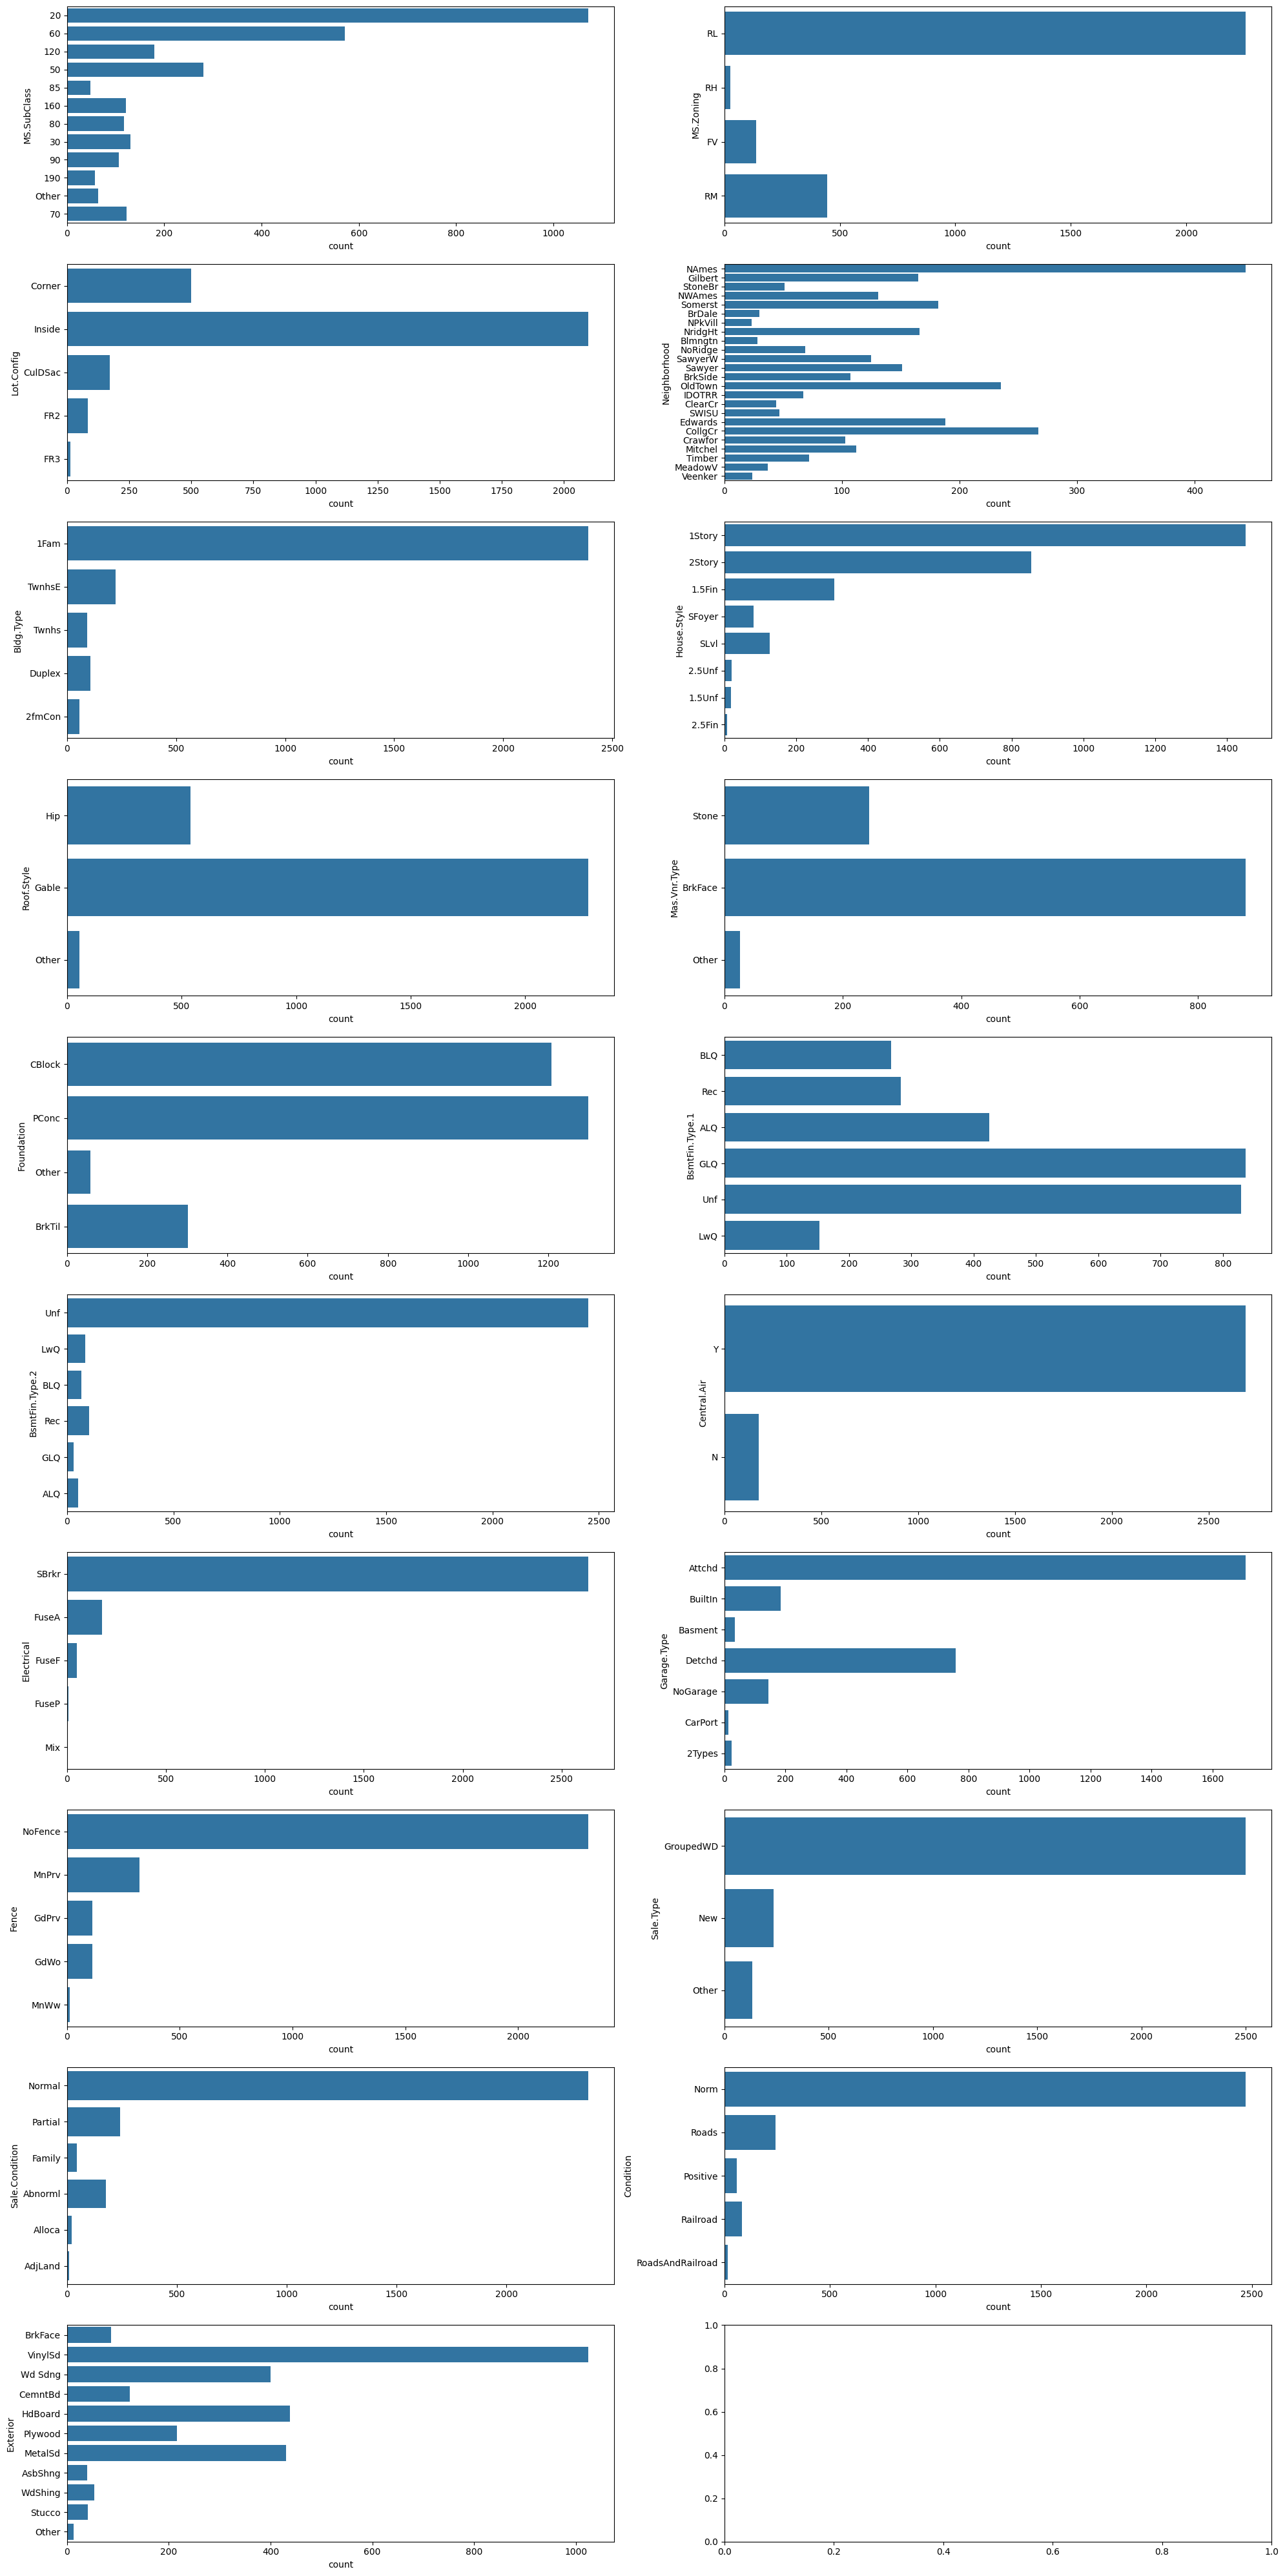

In [21]:
# Plot all categorical columns

fig, axes = plt.subplots(19//2 +1 , 2, figsize=(20, 40))

axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(X[col], ax=axes[i])

plt.tight_layout()

In [22]:
# Group Lot.Config FR2 and FR3 into FR2_3

X['Lot.Config'] = X['Lot.Config'].replace(['FR2', 'FR3'], 'FR2_3')

In [23]:
# Group HouseStyle 1.5Unf, 2.5Fin, 2.5Unf into 1.5+Unf_2.5+Fin

X['House.Style'] = X['House.Style'].replace(['1.5Unf', '2.5Fin', '2.5Unf'], '1.5+Unf_2.5+Fin')

In [24]:
# drop Electrical's FuseP and Mix

X = X[X['Electrical'] != 'FuseP']
X = X[X['Electrical'] != 'Mix']
y = y.loc[X.index]

In [25]:
# drop Fence's MnWw 

X = X[X['Fence'] != 'MnWw']
y = y.loc[X.index]

# Organizar Tipos

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2848 entries, 0 to 2871
Data columns (total 67 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS.SubClass      2848 non-null   object 
 1   MS.Zoning        2848 non-null   object 
 2   Lot.Frontage     2848 non-null   float64
 3   Lot.Area         2848 non-null   float64
 4   Lot.Shape        2848 non-null   float64
 5   Land.Contour     2848 non-null   float64
 6   Lot.Config       2848 non-null   object 
 7   Land.Slope       2848 non-null   float64
 8   Neighborhood     2848 non-null   object 
 9   Bldg.Type        2848 non-null   object 
 10  House.Style      2848 non-null   object 
 11  Overall.Qual     2848 non-null   int64  
 12  Overall.Cond     2848 non-null   int64  
 13  Roof.Style       2848 non-null   object 
 14  Mas.Vnr.Type     1147 non-null   object 
 15  Mas.Vnr.Area     2848 non-null   float64
 16  Exter.Qual       2848 non-null   float64
 17  Exter.Cond       28

In [28]:
# year and month sold are categorical

X['Yr.Sold'] = X['Yr.Sold'].astype('object')
X['Mo.Sold'] = X['Mo.Sold'].astype('object')

# everything that starts with Has or Was is bool, change the types

boolean_cols = [col for col in X.columns if col.startswith('Has') or col.startswith('Was')]

X[boolean_cols] = X[boolean_cols].astype('bool')

# get all columns
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in boolean_cols]

categorical_cols = X.select_dtypes(include='object').columns.tolist()

print(len(numerical_cols))
print(len(categorical_cols))
print(len(boolean_cols))

39
21
7


In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2848 entries, 0 to 2871
Data columns (total 67 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS.SubClass      2848 non-null   object 
 1   MS.Zoning        2848 non-null   object 
 2   Lot.Frontage     2848 non-null   float64
 3   Lot.Area         2848 non-null   float64
 4   Lot.Shape        2848 non-null   float64
 5   Land.Contour     2848 non-null   float64
 6   Lot.Config       2848 non-null   object 
 7   Land.Slope       2848 non-null   float64
 8   Neighborhood     2848 non-null   object 
 9   Bldg.Type        2848 non-null   object 
 10  House.Style      2848 non-null   object 
 11  Overall.Qual     2848 non-null   int64  
 12  Overall.Cond     2848 non-null   int64  
 13  Roof.Style       2848 non-null   object 
 14  Mas.Vnr.Type     1147 non-null   object 
 15  Mas.Vnr.Area     2848 non-null   float64
 16  Exter.Qual       2848 non-null   float64
 17  Exter.Cond       28

# Testar com Modelo

In [30]:
# Let's create a pipeline:
# apply scaler to numerical cols
# apply one hot encoder to categorical cols

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numerical_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

In [31]:
#X_model = pd.get_dummies(X, drop_first=True).copy()

X_model = preprocessor.fit_transform(X)

In [32]:
print(X_model.shape)

(2848, 156)


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_model, y, test_size=0.2, random_state=RANDOM_SEED)

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1., 5., 10., 25.], 'max_iter': [50000]}
lasso = GridSearchCV(Lasso(), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
lasso.fit(X_train, y_train)
alpha = lasso.best_params_['alpha']

# Hone in
param_grid = {'alpha': [x/100. * alpha for x in range(50, 150, 5)], 'max_iter': [50000]}
lasso = GridSearchCV(Lasso(), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
lasso.fit(X_train, y_train)
alpha = lasso.best_params_['alpha']
lasso = lasso.best_estimator_

print(f'Lasso best alpha: {alpha}')

Lasso best alpha: 6.500000000000001e-05


In [36]:
from sklearn.metrics import mean_squared_error

y_pred = lasso.predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

error_percent = 100 * (10**RMSE - 1)
print(f'Average error is {error_percent:.2f}%')

Average error is 10.80%


In [37]:
# load again the data without the transformations from the csv

X_v2 = pd.read_csv(processed_data_x_path)
y_v2 = pd.read_csv(processed_data_y_path)

In [38]:
X_model_2 = pd.get_dummies(X_v2, drop_first=True).copy()

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_model_2, y_v2, test_size=0.2, random_state=RANDOM_SEED)

numerical_cols = X_train_2.select_dtypes(include=np.number).columns.tolist()

scaler = RobustScaler()
X_train_2.loc[:,numerical_cols] = scaler.fit_transform(X_train_2[numerical_cols])
X_test_2.loc[:,numerical_cols] = scaler.transform(X_test_2[numerical_cols])

lasso2 = Lasso(alpha=alpha, max_iter=50000, random_state=RANDOM_SEED)

lasso2.fit(X_train_2, y_train_2)

y_pred_2 = lasso2.predict(X_test_2)

RMSE_2 = np.sqrt(mean_squared_error(y_test_2, y_pred_2))

error_percent_2 = 100 * (10**RMSE_2 - 1)

print(f'Average error is {error_percent_2:.2f}%')

Average error is 10.20%
